In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_model_optimization as tfmot
import tensorflow as tf
import os
import tempfile
from keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [2]:
dataset = pd.read_excel('train_0.5s_delay.xlsx').values

In [3]:
train_percentage = 80
val_percentage = 20
def slice_dataset(dataset, percentage):
    data_size = len(dataset)
    index = [i for i in range (len(dataset))]
    np.random.shuffle(index)
    dataset_random = dataset[index,:]
    return dataset_random[:int(data_size*percentage/100)],dataset_random[int(data_size*percentage/100):]

train_dataset,val_dataset = slice_dataset(dataset, train_percentage)

In [4]:
x_train = np.expand_dims(train_dataset[:,0:2600].astype(float),axis =2)
Y_train = np.expand_dims(train_dataset[:,2600].astype(float),axis =1)
x_test = np.expand_dims(val_dataset[:,0:2600].astype(float),axis =2)
Y_test = np.expand_dims(val_dataset[:,2600].astype(float),axis =1)

In [5]:
Y_test

array([[7.5],
       [7. ],
       [7.5],
       [8. ],
       [3.5],
       [7. ],
       [4.5],
       [4.5],
       [5. ],
       [3.5],
       [5. ],
       [3. ],
       [5.5],
       [3.5],
       [7.5],
       [4.5],
       [3. ],
       [3. ],
       [4.5],
       [5.5],
       [3.5],
       [3. ],
       [5. ],
       [3.5],
       [7.5],
       [7. ],
       [5.5],
       [6. ],
       [4.5],
       [4. ],
       [6. ],
       [7. ],
       [6. ],
       [6. ],
       [7. ],
       [8. ],
       [8. ],
       [4. ],
       [3. ],
       [5.5],
       [7. ],
       [7. ],
       [6. ],
       [7. ],
       [6. ],
       [5. ],
       [4.5],
       [3. ],
       [5.5],
       [6. ],
       [5.5],
       [4.5],
       [5. ],
       [3. ],
       [3.5],
       [7.5],
       [5. ],
       [7. ],
       [3. ],
       [7.5],
       [4. ],
       [6. ],
       [5.5],
       [7. ],
       [6. ],
       [4. ],
       [8. ],
       [7.5],
       [5.5],
       [8. ],
       [6.5],
      

In [6]:
X_train = x_train.reshape(x_train.shape[0],1, x_train.shape[1])
X_test = x_test.reshape(x_test.shape[0],1, x_test.shape[1])

In [9]:
def setup_model():
    model = keras.Sequential([
        #keras.layers.InputLayer(input_shape =(X_train.shape[1],X_train.shape[2])),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu',input_shape =(X_train.shape[1],X_train.shape[2])),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu'),
        keras.layers.LSTM(32, return_sequences=True),
        keras.layers.Flatten(),
        #eras.layers.Reshape(target_shape=(99,1,1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.01),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='linear'),
    ])
    return model

In [10]:
base_model = setup_model()
base_model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = ['mae','mse'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor = 0.5, patience=20, mode='auto')
log_filepath = os.path.join('log')
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_filepath,histogram_freq=1)
history = base_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200,batch_size=16,callbacks=[reduce_lr])
scores = base_model.evaluate(X_test, Y_test, verbose=0)
#model.save(os.path.join(log_filepath,'DNN_model.h5'))
print('%s: %.2f%%' % (base_model.metrics_names[1], scores[1] * 100))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
50/55 [==========================>...] - ETA: 0s - loss: 8.8985 - mae: 2.3527 - mse: 8.8985   WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C7A68D23A8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VE

55/55 [==============================] - 0s 3ms/step - loss: 0.0692 - mae: 0.2052 - mse: 0.0692 - val_loss: 0.2647 - val_mae: 0.3526 - val_mse: 0.2647 - lr: 0.0010
Epoch 37/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0559 - mae: 0.1843 - mse: 0.0559 - val_loss: 0.1933 - val_mae: 0.2845 - val_mse: 0.1933 - lr: 0.0010
Epoch 38/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0550 - mae: 0.1827 - mse: 0.0550 - val_loss: 0.2149 - val_mae: 0.3168 - val_mse: 0.2149 - lr: 0.0010
Epoch 39/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0576 - mae: 0.1839 - mse: 0.0576 - val_loss: 0.2344 - val_mae: 0.3267 - val_mse: 0.2344 - lr: 0.0010
Epoch 40/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0628 - mae: 0.1980 - mse: 0.0628 - val_loss: 0.2281 - val_mae: 0.3339 - val_mse: 0.2281 - lr: 0.0010
Epoch 41/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0881 - mae: 0.2310 - mse: 0.0881 - val_loss: 0.2113 

Epoch 82/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0228 - mae: 0.1126 - mse: 0.0228 - val_loss: 0.2194 - val_mae: 0.3052 - val_mse: 0.2194 - lr: 2.5000e-04
Epoch 83/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0236 - mae: 0.1153 - mse: 0.0236 - val_loss: 0.2117 - val_mae: 0.2951 - val_mse: 0.2117 - lr: 2.5000e-04
Epoch 84/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0219 - mae: 0.1085 - mse: 0.0219 - val_loss: 0.2281 - val_mae: 0.3037 - val_mse: 0.2281 - lr: 2.5000e-04
Epoch 85/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0224 - mae: 0.1106 - mse: 0.0224 - val_loss: 0.2001 - val_mae: 0.2846 - val_mse: 0.2001 - lr: 2.5000e-04
Epoch 86/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0237 - mae: 0.1141 - mse: 0.0237 - val_loss: 0.2058 - val_mae: 0.2867 - val_mse: 0.2058 - lr: 2.5000e-04
Epoch 87/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0250 - mae: 0.1209 

55/55 [==============================] - 0s 3ms/step - loss: 0.0149 - mae: 0.0860 - mse: 0.0149 - val_loss: 0.2053 - val_mae: 0.2851 - val_mse: 0.2053 - lr: 6.2500e-05
Epoch 128/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0150 - mae: 0.0854 - mse: 0.0150 - val_loss: 0.2039 - val_mae: 0.2842 - val_mse: 0.2039 - lr: 3.1250e-05
Epoch 129/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.0833 - mse: 0.0145 - val_loss: 0.2071 - val_mae: 0.2860 - val_mse: 0.2071 - lr: 3.1250e-05
Epoch 130/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0155 - mae: 0.0869 - mse: 0.0155 - val_loss: 0.2047 - val_mae: 0.2830 - val_mse: 0.2047 - lr: 3.1250e-05
Epoch 131/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0144 - mae: 0.0826 - mse: 0.0144 - val_loss: 0.2022 - val_mae: 0.2825 - val_mse: 0.2022 - lr: 3.1250e-05
Epoch 132/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0147 - mae: 0.0848 - mse: 0

55/55 [==============================] - 0s 3ms/step - loss: 0.0136 - mae: 0.0804 - mse: 0.0136 - val_loss: 0.2073 - val_mae: 0.2837 - val_mse: 0.2073 - lr: 7.8125e-06
Epoch 173/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0136 - mae: 0.0810 - mse: 0.0136 - val_loss: 0.2046 - val_mae: 0.2845 - val_mse: 0.2046 - lr: 7.8125e-06
Epoch 174/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0142 - mae: 0.0828 - mse: 0.0142 - val_loss: 0.2039 - val_mae: 0.2843 - val_mse: 0.2039 - lr: 7.8125e-06
Epoch 175/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0131 - mae: 0.0803 - mse: 0.0131 - val_loss: 0.2078 - val_mae: 0.2849 - val_mse: 0.2078 - lr: 7.8125e-06
Epoch 176/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0133 - mae: 0.0798 - mse: 0.0133 - val_loss: 0.2060 - val_mae: 0.2858 - val_mse: 0.2060 - lr: 7.8125e-06
Epoch 177/200
55/55 [==============================] - 0s 3ms/step - loss: 0.0142 - mae: 0.0822 - mse: 0

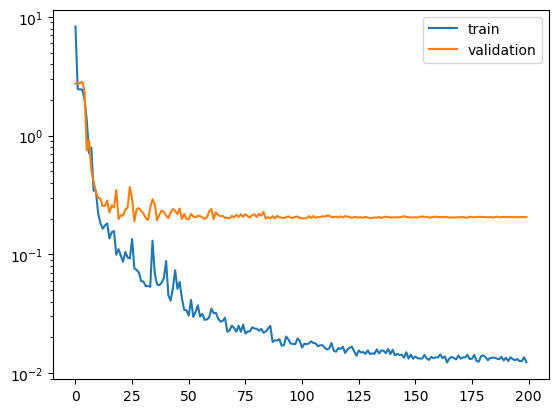

In [11]:
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [13]:
predicted =base_model.predict(X_test)
#inverse_data1 = min_max_scaler.inverse_transform(predicted)
#inverse_data2 = min_max_scaler.inverse_transform(Y_test)
print(predicted[1])
print(Y_test[1].reshape(1))
ERR = []
for i in range(0,len(Y_test)):
    error=(predicted[i]-Y_test[i].reshape(1))
    ERR.append(error)
ERR=np.abs(np.array(ERR))

7/7 [==============================] - 0s 2ms/step
[6.9607697]
[7.]


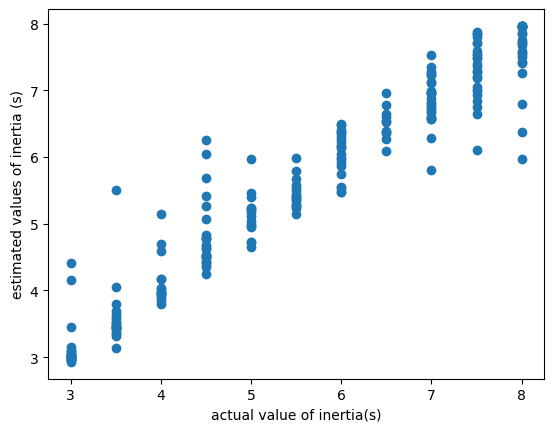

In [14]:
plt.xlabel('actual value of inertia(s)')
plt.ylabel('estimated values of inertia (s)')
plt.scatter(Y_test,predicted)
plt.savefig('Scatters_LRCN_Delay_0.5.png',dpi=1000)
plt.show()

In [15]:
#print(ERR)
absvalues  = ERR.reshape(-1)
def acc(thre):
    Accuracy = np.sum(absvalues<=thre)/len(absvalues)
    return  Accuracy
print('\nTolerance=0.1: Accuracy=',  acc(0.1),
      '\nTolerance=0.2: Accuracy=',  acc(0.2),
      '\nTolerance=0.3: Accuracy=',  acc(0.3),
    '\nTolerance=0.4: Accuracy=', acc(0.4),'\nTolerance=0.5: Accuracy=',  acc(0.5))


Tolerance=0.1: Accuracy= 0.35 
Tolerance=0.2: Accuracy= 0.5363636363636364 
Tolerance=0.3: Accuracy= 0.6954545454545454 
Tolerance=0.4: Accuracy= 0.7681818181818182 
Tolerance=0.5: Accuracy= 0.8590909090909091


In [16]:
r =1-(np.sum(np.square(ERR)))/np.sum(np.square(Y_test-np.mean(Y_test)))

In [17]:
r

0.9248831633854022